In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [2]:
wd = pd.read_csv('Assignment winequality-red.csv')
wd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#wd.isnull().any()
wd.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
corr = wd.corr()['quality']

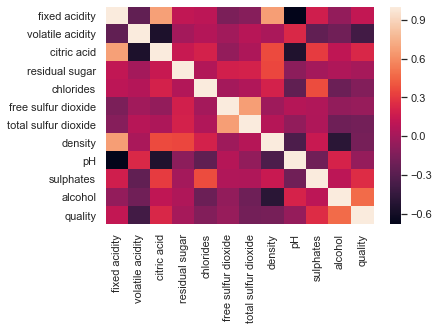

In [8]:
sns.heatmap(wd.corr())

In [10]:
corr[corr>0.2]

citric acid    0.226373
sulphates      0.251397
alcohol        0.476166
quality        1.000000
Name: quality, dtype: float64

In [11]:
corr[corr<-0.2]

volatile acidity   -0.390558
Name: quality, dtype: float64

In [14]:
y = wd['quality']
x = wd[['citric acid','sulphates','alcohol','volatile acidity']]

In [15]:
reg = LinearRegression()

In [16]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
reg.coef_

array([-0.07912506,  0.69551611,  0.30907815, -1.26505845])

In [18]:
coeffSumm = pd.DataFrame({'Var' : ['citric acid','sulphates','alcohol','volatile acidity'], 'Coeff' : reg.coef_})
coeffSumm

,Var,Coeff
0,citric acid,-0.079125
1,sulphates,0.695516
2,alcohol,0.309078
3,volatile acidity,-1.265058


In [20]:
reg.score(x,y)

0.33613926635016045

In [21]:
from sklearn.linear_model import Ridge

In [22]:
ridge = Ridge(alpha = 0.5)

In [23]:
ridge.fit(x,y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [24]:
ridge.coef_

array([-0.06796285,  0.68864152,  0.30947113, -1.24740138])

In [25]:
coeffSumm['Ridge'] = ridge.coef_

In [26]:
coeffSumm

,Var,Coeff,Ridge
0,citric acid,-0.079125,-0.067963
1,sulphates,0.695516,0.688642
2,alcohol,0.309078,0.309471
3,volatile acidity,-1.265058,-1.247401


In [27]:
ridge.score(x,y)

0.3361261222832683

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
y_pred = reg.predict(wd[['citric acid','sulphates','alcohol','volatile acidity']])

In [34]:
y1_pred = ridge.predict(wd[['citric acid','sulphates','alcohol','volatile acidity']])

In [30]:
y_pred

array([5.05520054, 5.03458321, 5.16235973, ..., 5.91194848, 5.46687368,
       6.0754612 ])

In [31]:
#Smaller the value better the model
mean_squared_error(y_pred, y)

0.4326782301361088

In [35]:
mean_squared_error(y1_pred, y)

0.4326867969202419